#### Notes pour l'analyse descriptive
Les questions d'analyses descriptives que l'on peut se poser:
- Fréquence des accidents: Où se produisent le plus d'accidents ? À quelles heures ?  Quels mois de l'année ?
- Profils des victimes : Quel est l'âge moyen des victimes ? Quel est leur sexe ? Quelle est leur catégorie sociale ?
- Caractéristiques des véhicules impliqués : Quel type de véhicule est le plus souvent impliqué ? Quel est l'âge moyen des véhicules ?
- Conditions météorologiques : Quel est l'impact de la pluie, du brouillard, de la neige sur la fréquence et la gravité des accidents ?
- Quel type de route est le plus dangereux ? Quelle est l'influence de la présence de virages, de passages piétons, etc. ?

Utilisation possible des résultats:
Amélioration de la sécurité routière : Identification des zones à risque, mise en place de mesures de prévention ciblées
- Identification des zones noires : Les zones où les accidents sont fréquents peuvent être traitées en priorité pour améliorer la sécurité.
- Optimisation des patrouilles de police : Les forces de l'ordre peuvent concentrer leurs efforts sur les zones et les moments où le risque d'accident est le plus élevé.
- Facteurs influençant la gravité: En analysant les données sur les blessures et les décès, on peut identifier les facteurs qui aggravent les conséquences des accidents (vitesse, port de la ceinture de sécurité, type de véhicule).
- Prévision de la gravité d'un accident: En combinant différentes variables, on peut développer des modèles prédictifs pour estimer la gravité potentielle d'un accident en fonction des circonstances.

## Projet python pour la data science / 2024-2025

* Kevin, Oscar, Lisa

## Introduction

In [ ]:
!pip install requests
!pip install os
!pip install matplotlib 
!pip install pandas
!pip install plotly
!pip install io
!pip install seaborn
!pip install ipywidgets
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 KB 24.4 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 77.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/3

### Importing packages

In [ ]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
import seaborn as sns
import ipywidgets as widgets
from tabulate import tabulate

### **I- Présentation des bases de données**

Dans cette partie, nous allons présenté les bases données qui seront utilisées dans ce projet. Il s'agira de faire de brèves descriptions des bases afin de prendre connaissance de leur contenu:
- base des usagers ayant été impliqué dans un accident de circulation en 2023
- base qui donne la description des véhicules impliqués dans un accident de circulation en 2023
- base des lieux où s'est produit l'accident
- base contenant les caractéristiques des accidents.
- base des départements de France

In [3]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='/home/onyxia/Projet-Python-pour-la-Data-Science/data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv


In [6]:
# téléchargement de la liste des départements
url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page=1"
response=requests.get(url_code_dep)
data=response.json()
df_code_dep = pd.DataFrame(data["data"])
df_dep=df_code_dep
for i in range(2,7):
    url_code_dep=f"https://tabular-api.data.gouv.fr/api/resources/e436f772-b05d-47f8-b246-265faab8679f/data/?page={i}"
    response=requests.get(url_code_dep)
    if response.status_code==200:
        data=response.json()
        df_code_dep1 = pd.DataFrame(data["data"])
    else:
        print("downloading failed")
    df_dep=pd.concat([df_dep, df_code_dep1], axis=0)





In [7]:
df_dep.head()

,__id,DEP,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,1,01,84,01053,5,AIN,Ain,Ain
1,2,02,32,02408,5,AISNE,Aisne,Aisne
2,3,03,84,03190,5,ALLIER,Allier,Allier
3,4,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,5,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes


## Base USAGERS

Selon le "Guide BAAC 2017" un usager est une personne physique impliquée dans un accident de la circulation en tant que conducteur/passager d'un véhicule ou piéton.

In [4]:
# base des usagers 
df_usagers = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/usagers-2023.csv", sep = ';')
df_usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


Répartition par sexe : Proportion d'hommes et de femmes impliqués dans les accidents.
Selon "Guide BAAC 2017" 1 = Masculin, 2 = Feminin

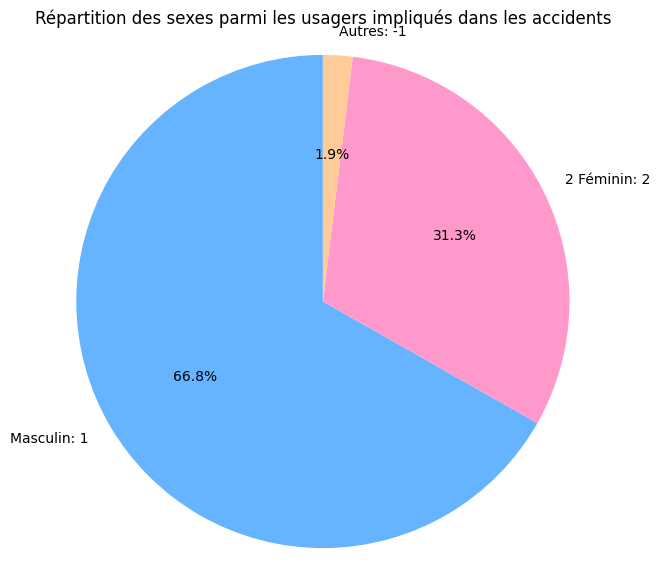

In [6]:
df_usagers['sexe_label'] = df_usagers['sexe'].replace({
    1: 'Masculin: 1', 
    2: '2 Féminin: 2', 
    -1: 'Autres: -1'
})

# Compter la répartition des sexes après remplacement
sexe_counts = df_usagers['sexe_label'].value_counts()

colors = ['#66b3ff', '#ff99cc', '#ffcc99']  # Masculin, Féminin, Autres

# Tracer un diagramme circulaire
plt.figure(figsize=(7, 7))
plt.pie(sexe_counts, labels=sexe_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Répartition des sexes parmi les usagers impliqués dans les accidents")
plt.axis('equal') 
plt.show()
#La majorité des usagers impliqués dans les accidents sont de sexe masculin, représentant 66,8% du total. 
# Cela suggère que, dans cette population, les hommes sont nettement plus nombreux que les femmes à être impliqués dans des accidents.
# Les femmes représentent 31,3% des usagers impliqués et la catégorie "autres" représente 1,9% des cas, ce qui pourrait inclure des 
# personnes dont le sexe n'est pas précisé ou qui ne s'identifient pas selon les catégories traditionnelles de sexe. 
# Cette proportion est relativement faible, mais elle mérite d'être mentionnée.

Repartition selon l'âge

/tmp/ipykernel_7587/2482693012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usagers['age'] = 2023 - df_usagers['an_nais']


╒═══════════════╤═══════════╕
│ Statistique   │    Valeur │
╞═══════════════╪═══════════╡
│ Nombre        │ 123191    │
├───────────────┼───────────┤
│ Moyenne       │     38.75 │
├───────────────┼───────────┤
│ Écart-type    │     19.1  │
├───────────────┼───────────┤
│ Min           │      0    │
├───────────────┼───────────┤
│ 25%           │     23    │
├───────────────┼───────────┤
│ 50% (médiane) │     35    │
├───────────────┼───────────┤
│ 75%           │     52    │
├───────────────┼───────────┤
│ Max           │    110    │
╘═══════════════╧═══════════╛
╒═════════════════╤════════════════════╤══════════════════╕
│ Tranche d'âge   │   Nombre d'usagers │   Proportion (%) │
╞═════════════════╪════════════════════╪══════════════════╡
│ [0-9]           │               3504 │             2.84 │
├─────────────────┼────────────────────┼──────────────────┤
│ [10-19]         │              13799 │            11.2  │
├─────────────────┼────────────────────┼──────────────────┤
│ [20-29] 

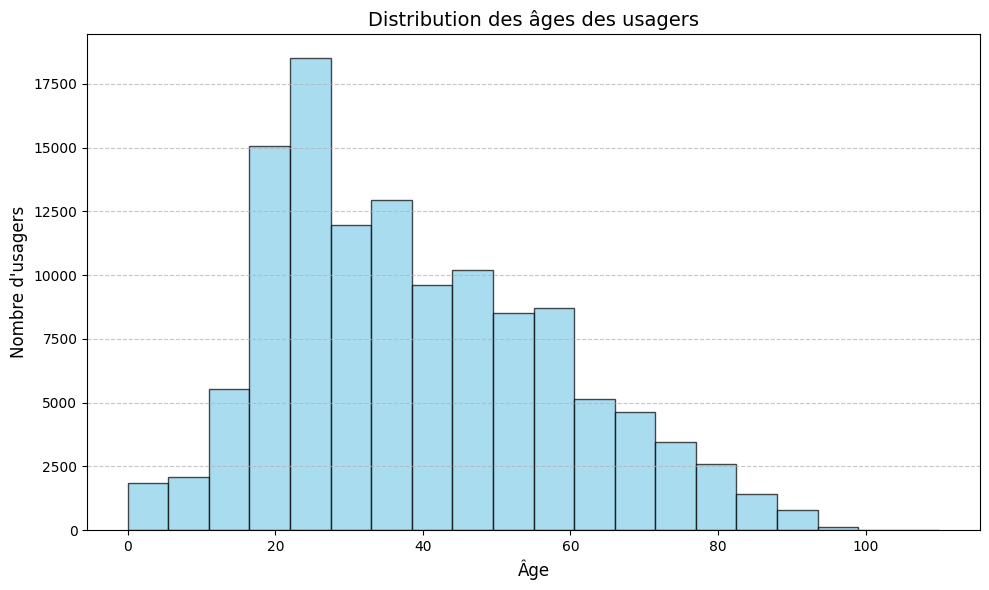

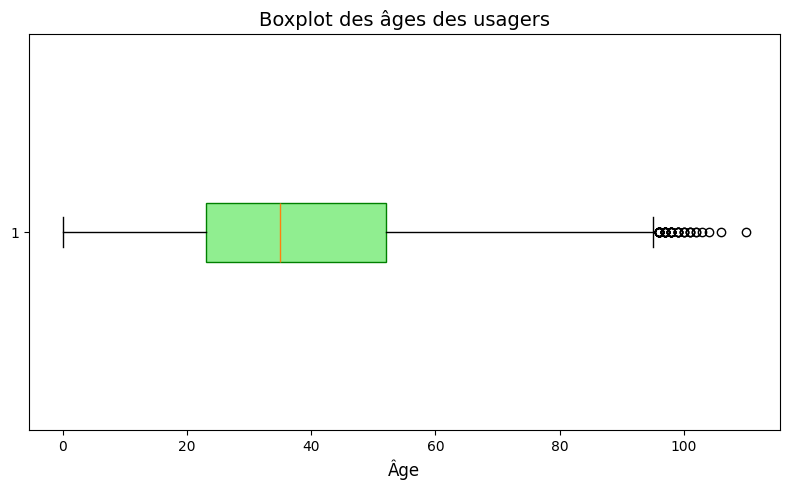

In [ ]:
df_usagers['age'] = 2023 - df_usagers['an_nais']
# Calcul des statistiques descriptives
age_stats = df_usagers['age'].describe()

age_summary = pd.DataFrame({
    'Statistique': ['Nombre', 'Moyenne', 'Écart-type', 'Min', '25%', '50% (médiane)', '75%', 'Max'],
    'Valeur': [
        int(age_stats['count']),
        round(age_stats['mean'], 2),
        round(age_stats['std'], 2),
        int(age_stats['min']),
        int(age_stats['25%']),
        int(age_stats['50%']),
        int(age_stats['75%']),
        int(age_stats['max']),
    ]
})
print(tabulate(age_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Groupement des âges par tranche de 10 ans
age_bins = pd.cut(df_usagers['age'], bins=range(0, 121, 10), right=False)
age_distribution = age_bins.value_counts().sort_index()

distribution_summary = pd.DataFrame({
    'Tranche d\'âge': [f"[{int(interval.left)}-{int(interval.right - 1)}]" for interval in age_distribution.index],
    'Nombre d\'usagers': age_distribution.values,
    'Proportion (%)': (age_distribution.values / len(df_usagers) * 100).round(2)
})

print(tabulate(distribution_summary, headers='keys', tablefmt='fancy_grid', showindex=False))

# Histogramme
plt.figure(figsize=(10, 6))
plt.hist(df_usagers['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Distribution des âges des usagers', fontsize=14)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Nombre d\'usagers', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Boxplot pour visualiser les valeurs extrêmes
plt.figure(figsize=(8, 5))
plt.boxplot(df_usagers['age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'))

plt.title('Boxplot des âges des usagers', fontsize=14)
plt.xlabel('Âge', fontsize=12)

plt.tight_layout()
plt.show()

#La population analysée, composée de 123 191 usagers, présente un âge moyen de 38,75 ans, avec une dispersion modérée (écart-type de 19,1 ans) 
# et une médiane de 35 ans, indiquant que la moitié des individus a cet âge ou moins. La majorité des usagers se situe entre 23 ans (1er quartile) 
# et 52 ans (3e quartile), avec des âges extrêmes allant de 0 à 110 ans, bien que ces valeurs puissent inclure des erreurs ou des cas particuliers.
#  La distribution par tranche d'âge révèle une forte proportion de jeunes (11,2 % entre 10 et 19 ans) et une concentration probable dans les tranches d'âge actif (20-49 ans),
#  tandis que les individus très âgés (100 ans et plus) restent marginaux (0,01 %). Cette structure reflète une population principalement jeune et adulte.

Catégorie d'usagers (catu) : Identification des catégories les plus exposées (conducteurs, passagers, piétons).

╒════════════╤═════════════════════════╤══════════════╤══════════════════╕
│ catu       │   Nombre d'observations │   Proportion │   Proportion (%) │
╞════════════╪═════════════════════════╪══════════════╪══════════════════╡
│ Conducteur │                   93462 │    0.743006  │         74.3006  │
├────────────┼─────────────────────────┼──────────────┼──────────────────┤
│ Passager   │                   22806 │    0.181304  │         18.1304  │
├────────────┼─────────────────────────┼──────────────┼──────────────────┤
│ Piéton     │                    9521 │    0.0756902 │          7.56902 │
╘════════════╧═════════════════════════╧══════════════╧══════════════════╛


/tmp/ipykernel_7587/1268213420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


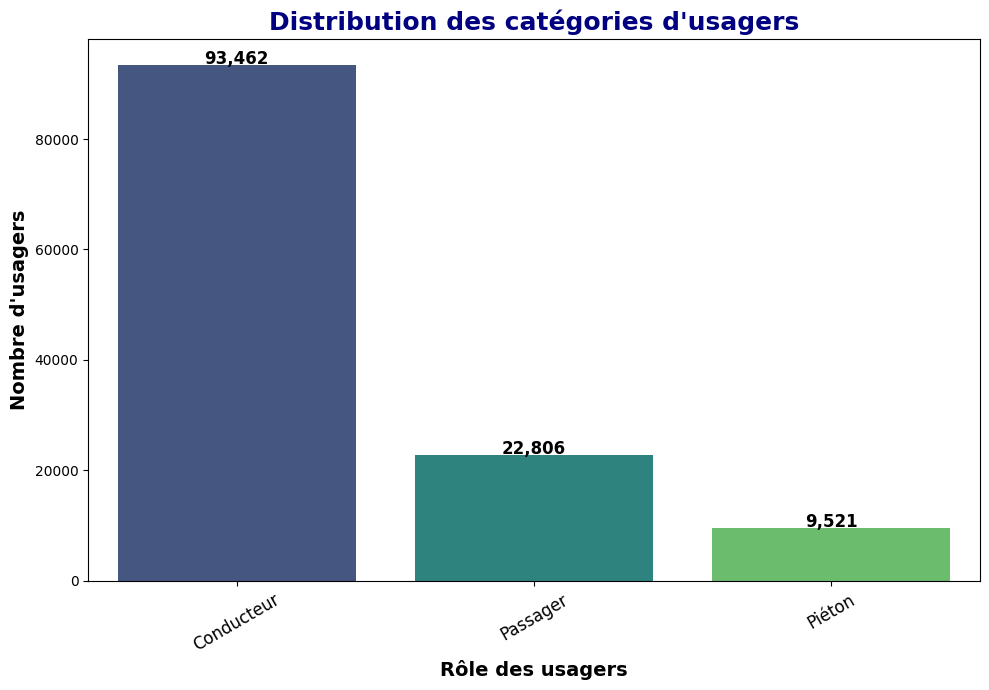

In [28]:
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Piéton'}
catu_summary['Proportion (%)'] = catu_summary['Proportion'] * 100
catu_summary = catu_summary.rename(columns={'Fréquence': 'Nombre d\'observations'})

# Affichage
print(tabulate(catu_summary, headers='keys', tablefmt='fancy_grid', showindex=True))

# Visualisation
plt.figure(figsize=(10, 7))
sns.barplot(
    x=catu_counts.index,
    y=catu_counts.values,
    palette="viridis"  # Une palette moderne et vive
)

plt.title("Distribution des catégories d'usagers", fontsize=18, weight='bold', color='navy')
plt.xlabel("Rôle des usagers", fontsize=14, weight='bold')
plt.ylabel("Nombre d'usagers", fontsize=14, weight='bold')

# Rotation des étiquettes des catégories
plt.xticks(rotation=30, fontsize=12)

# Ajouter les valeurs au-dessus des barres
for i, value in enumerate(catu_counts.values):
    plt.text(i, value + 200, f"{value:,}", ha='center', fontsize=12, color='black', weight='bold')

# Ajustement des marges pour éviter le chevauchement
plt.tight_layout()

plt.show()

# On observe que la majorité des personnes impliquées dans des accidents sont des conducteurs(soit 74,3% des usagers), 
# ensuite vient les passagers (18,1%) et enfin les piétons (7.6%). 

Répartition selon la gravité (grav) : Observation de la distribution des niveaux de gravité des accidents.

╒══════════════════════════╤═════════════════════════╤═══════════════════╕
│ Niveau de gravité        │   Nombre d'observations │   Pourcentage (%) │
╞══════════════════════════╪═════════════════════════╪═══════════════════╡
│ Indemne                  │                   50919 │          41.3334  │
├──────────────────────────┼─────────────────────────┼───────────────────┤
│ Tué                      │                    3398 │           2.75832 │
├──────────────────────────┼─────────────────────────┼───────────────────┤
│ Blessé hospitalisé > 24h │                   19271 │          15.6432  │
├──────────────────────────┼─────────────────────────┼───────────────────┤
│ Blessé léger             │                   49603 │          40.2651  │
╘══════════════════════════╧═════════════════════════╧═══════════════════╛


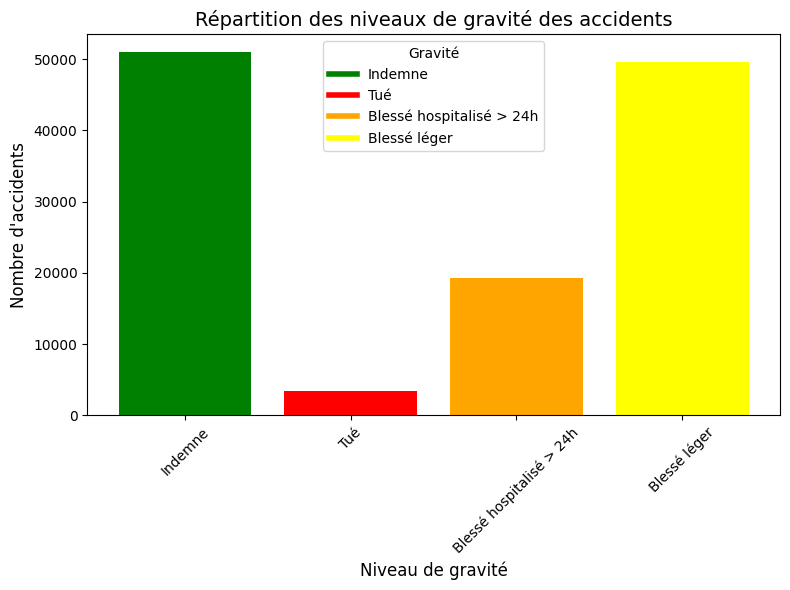

In [30]:
# Statistiques descriptives 
grav_stats = df_usagers['grav'].value_counts().sort_index()
grav_percentage = df_usagers['grav'].value_counts(normalize=True).sort_index() * 100

grav_labels = {
    1: 'Indemne', 
    2: 'Tué', 
    3: 'Blessé hospitalisé > 24h', 
    4: 'Blessé léger'
}

table_data = pd.DataFrame({
    "Niveau de gravité": [grav_labels.get(i, f"Gravité {i}") for i in grav_stats.index],
    "Nombre d'observations": grav_stats.values,
    "Pourcentage (%)": grav_percentage.values
})

print(tabulate(table_data, headers='keys', tablefmt='fancy_grid', showindex=False))

colors = {
    1: 'green',        # Indemne
    2: 'red',          # Tué
    3: 'orange',       # Blessé hospitalisé > 24h
    4: 'yellow'        # Blessé léger
}

# Génération des couleurs pour les barres
bar_colors = [colors.get(i, 'gray') for i in grav_stats.index]

# Création du graphique
plt.figure(figsize=(8, 6))
plt.bar(grav_stats.index, grav_stats.values, color=bar_colors)

# Ajout des titres et des étiquettes
plt.title('Répartition des niveaux de gravité des accidents', fontsize=14)
plt.xlabel('Niveau de gravité', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.xticks(grav_stats.index, [grav_labels.get(i, f"Gravité {i}") for i in grav_stats.index], rotation=45)

# Ajout d'une légende
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
plt.legend(custom_legend, [grav_labels[i] for i in colors.keys()], title="Gravité", fontsize=10)

plt.tight_layout()
plt.show()

#Les résultats montrent que la majorité des usagers impliqués dans les accidents (42,45 %) sont indemnes, ce qui indique que 
# les accidents sont souvent de faible gravité. Cependant, une proportion importante (39,43 %) subit des blessures légères, 
# tandis que 15,32 % sont gravement blessés et nécessitent une hospitalisation de plus de 24 heures. 
# Les accidents mortels représentent 2,7 % des cas, ce qui reste préoccupant. Il est également important de noter la présence 
# de valeurs -1 dans la variable de gravité, représentant environ 0,09 % des observations.

Analyse de la gravité en fonction du sexe ou de la catégorie d'usager.


Répartition de la gravité selon le sexe (en pourcentage) :
+--------------------------+-------+--------------------+--------------------+
|           grav           | Autre |      Masculin      |      Féminin       |
+--------------------------+-------+--------------------+--------------------+
|         Indemne          | 100.0 | 43.31341610314025  |  37.0992754544299  |
|           Tué            |  0.0  | 3.1545553210013475 | 1.9143256641667727 |
| Blessé hospitalisé > 24h |  0.0  | 16.131763807888177 | 14.605313334180755 |
|       Blessé léger       |  0.0  | 37.400264767970235 | 46.381085547222575 |
+--------------------------+-------+--------------------+--------------------+


<Figure size 1000x600 with 0 Axes>

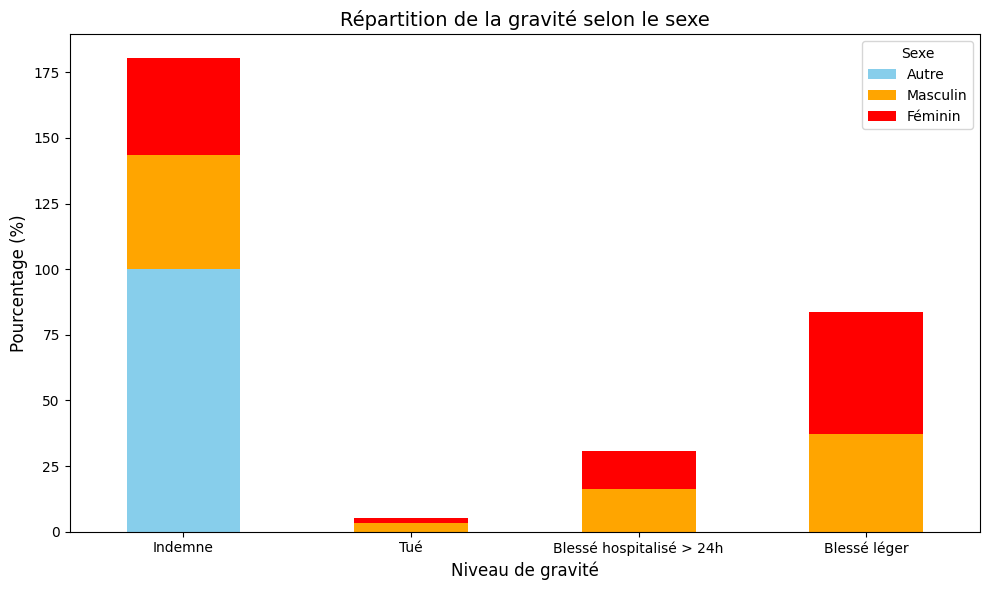


Répartition de la gravité selon la catégorie d’usager (en pourcentage) :
+--------------------------+--------------------+--------------------+--------------------+
|           grav           |     Conducteur     |      Passager      |       Piéton       |
+--------------------------+--------------------+--------------------+--------------------+
|         Indemne          | 46.10906930170118  | 38.24729154787491  | 3.111204540676897  |
|           Tué            | 2.684918242038777  | 2.122900127198561  |  4.98213159554341  |
| Blessé hospitalisé > 24h | 14.642707806069676 | 14.772577744637921 | 27.286104687828463 |
|       Blessé léger       | 36.56330465019037  | 44.85723058028861  | 64.62055917595123  |
+--------------------------+--------------------+--------------------+--------------------+


<Figure size 1200x800 with 0 Axes>

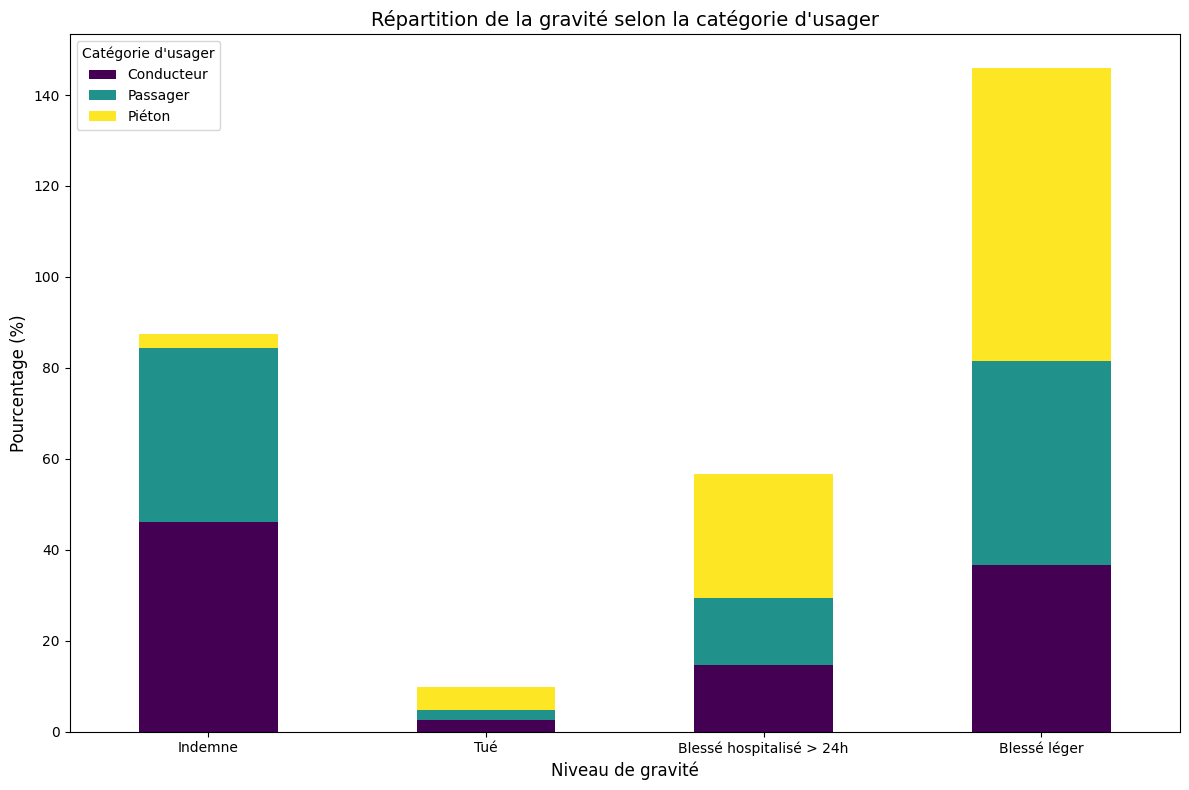

In [33]:
# Dictionnaires pour les libellés
sexe_labels = {1: 'Masculin', 2: 'Féminin', -1: 'Autre'}
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Piéton'}
grav_labels = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé > 24h', 4: 'Blessé léger'}

# 1. Répartition de la gravité selon le sexe (en pourcentage)
grav_sexe = pd.crosstab(df_usagers['grav'], df_usagers['sexe'], normalize='columns') * 100
grav_sexe = grav_sexe.rename(index=grav_labels, columns=sexe_labels)

print("\nRépartition de la gravité selon le sexe (en pourcentage) :")
print(tabulate(grav_sexe, headers='keys', tablefmt='pretty', numalign='right', floatfmt=".2f"))

# Visualisation de la gravité en fonction du sexe
plt.figure(figsize=(10, 6))
grav_sexe.index = [grav_labels.get(i, str(i)) for i in grav_sexe.index]  # Remplacer les indices par les libellés
grav_sexe.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'red', 'green'])
plt.title('Répartition de la gravité selon le sexe', fontsize=14)
plt.xlabel('Niveau de gravité', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Sexe', labels=[sexe_labels.get(x, str(x)) for x in grav_sexe.columns])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Répartition de la gravité selon la catégorie d’usager (en pourcentage)
grav_usager = pd.crosstab(df_usagers['grav'], df_usagers['catu'], normalize='columns') * 100
grav_usager = grav_usager.rename(index=grav_labels, columns=catu_labels)

print("\nRépartition de la gravité selon la catégorie d’usager (en pourcentage) :")
print(tabulate(grav_usager, headers='keys', tablefmt='pretty', numalign='right', floatfmt=".2f"))

# Visualisation de la gravité en fonction de la catégorie d’usager
plt.figure(figsize=(12, 8))
grav_usager.index = [grav_labels.get(i, str(i)) for i in grav_usager.index]  # Remplacer les indices par les libellés
grav_usager.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Répartition de la gravité selon la catégorie d\'usager', fontsize=14)
plt.xlabel('Niveau de gravité', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Catégorie d\'usager', labels=[catu_labels.get(x, str(x)) for x in grav_usager.columns])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
 
#La répartition de la gravité selon le sexe met en évidence une surreprésentation des hommes dans toutes les catégories de gravité.
#  Les hommes représentent la majorité des personnes indemnes, des blessés légers, des blessés graves (hospitalisation > 24h) et des tués.
#  Les femmes, bien qu’impliquées dans les accidents, présentent des proportions plus faibles dans toutes les catégories de gravité. 
# Cette différence dans la répartition pourrait être liée à des variations dans les types d'usagers ou les comportements sur la route selon le sexe.

#Concernant la catégorie d’usager, les conducteurs sont les plus représentés dans toutes les catégories de gravité,
#  qu’il s’agisse des personnes indemnes, blessées légèrement, blessées gravement ou tuées. Les piétons, bien que 
# proportionnellement moins nombreux que les conducteurs, affichent une part plus importante dans les catégories graves, 
# notamment les hospitalisations et les décès. Les passagers, quant à eux, se retrouvent principalement dans les catégories de blessures légères et d’indemnes,
#  avec une proportion plus faible dans les cas graves ou mortels. Ces différences illustrent des niveaux d’exposition distincts selon la catégorie d’usager.


analyse des équipements de sécurité (secu1, secu2)

In [35]:
from tabulate import tabulate

# 1. Répartition des dispositifs de sécurité (secu1)
print("\nRépartition des dispositifs de sécurité (secu1) :")
print(tabulate(secu1_usage.reset_index(), headers=["Dispositif de sécurité", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# 2. Répartition des équipements de sécurité (secu2)
print("\nRépartition des équipements de sécurité (secu2) :")
print(tabulate(secu2_usage.reset_index(), headers=["Équipement de sécurité", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))



Répartition des dispositifs de sécurité (secu1) :
+---+------------------------+--------------------+
|   | Dispositif de sécurité |  Pourcentage (%)   |
+---+------------------------+--------------------+
| 0 |        Ceinture        | 65.82564454766444  |
| 1 |         Casque         | 19.87276226967531  |
| 2 |    Non déterminable    | 13.645523635673557 |
| 3 |   Dispositif enfants   | 0.6560695469866888 |
+---+------------------------+--------------------+

Répartition des équipements de sécurité (secu2) :
+---+-----------------------------------+--------------------+
|   |      Équipement de sécurité       |  Pourcentage (%)   |
+---+-----------------------------------+--------------------+
| 0 |         Aucun équipement          | 74.58487625877582  |
| 1 |          Gants (2/3 RM)           | 19.90750825220757  |
| 2 |        Gilet réfléchissant        | 2.5552520902799887 |
| 3 |     Airbag personnel (2/3 RM)     | 1.9336137129069553 |
| 4 |        Autres équipements         |

/tmp/ipykernel_7587/879825750.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usagers['secu1_label'] = df_usagers['secu1'].map(secu1_labels)
/tmp/ipykernel_7587/879825750.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usagers['secu2_label'] = df_usagers['secu2'].map(secu2_labels)
/tmp/ipykernel_7587/879825750.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum


Répartition des dispositifs de sécurité (secu1) :
+---+------------------------+--------------------+
|   | Dispositif de sécurité |  Pourcentage (%)   |
+---+------------------------+--------------------+
| 0 |        Ceinture        | 65.82564454766444  |
| 1 |         Casque         | 19.87276226967531  |
| 2 |    Non déterminable    | 13.645523635673557 |
| 3 |   Dispositif enfants   | 0.6560695469866888 |
+---+------------------------+--------------------+


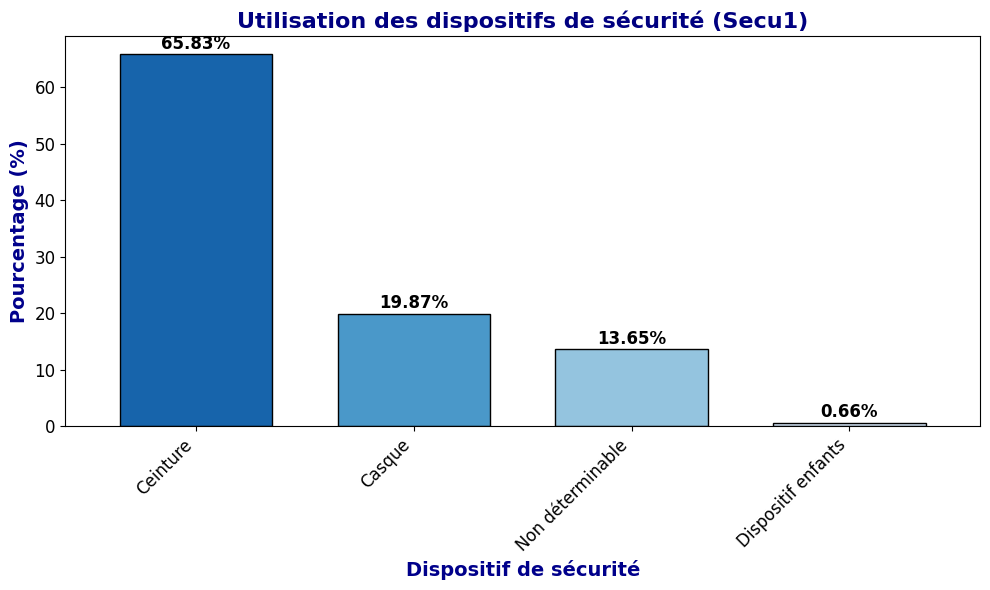


Répartition des équipements de sécurité (secu2) :
+---+-----------------------------------+--------------------+
|   |      Équipement de sécurité       |  Pourcentage (%)   |
+---+-----------------------------------+--------------------+
| 0 |         Aucun équipement          | 74.58487625877582  |
| 1 |          Gants (2/3 RM)           | 19.90750825220757  |
| 2 |        Gilet réfléchissant        | 2.5552520902799887 |
| 3 |     Airbag personnel (2/3 RM)     | 1.9336137129069553 |
| 4 |        Autres équipements         | 0.782493590925085  |
| 5 | Airbag personnel + Gants (2/3 RM) | 0.236256094904576  |
+---+-----------------------------------+--------------------+


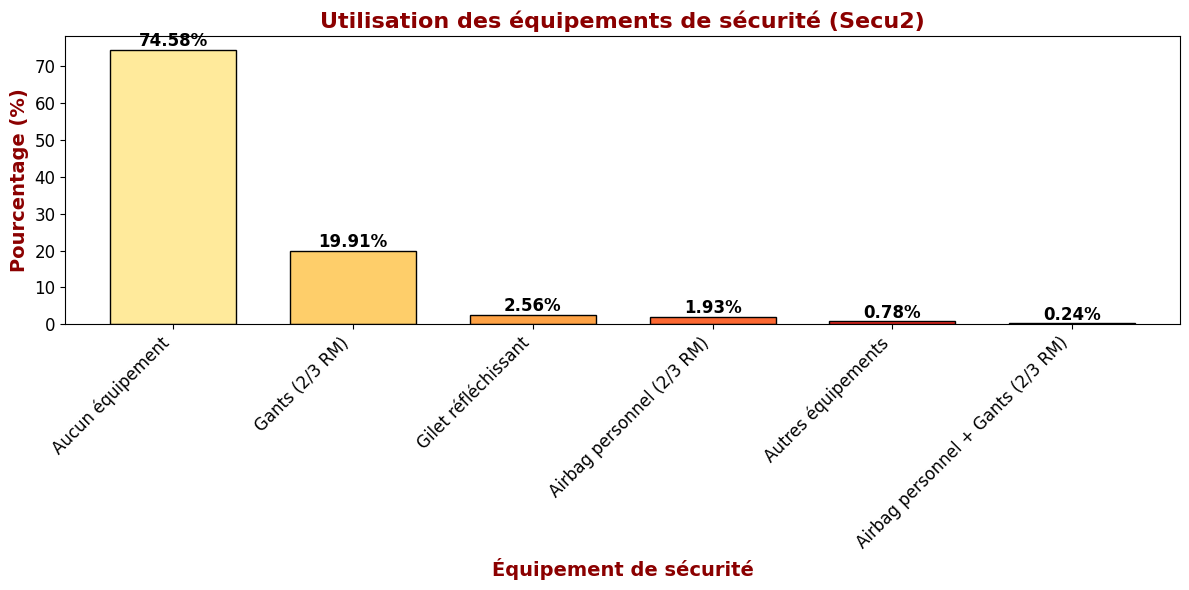


Impact des dispositifs de sécurité (Secu1) sur les accidents graves (en %) :
+---+-------------------------+-------------------+
|   | dispositifs de sécurité |  Pourcentage (%)  |
+---+-------------------------+-------------------+
| 0 |         Casque          | 65.34946114319494 |
| 1 |        Ceinture         | 89.36739792976579 |
| 2 |   Dispositif enfants    | 90.9090909090909  |
| 3 |    Non déterminable     | 82.95364238410596 |
+---+-------------------------+-------------------+


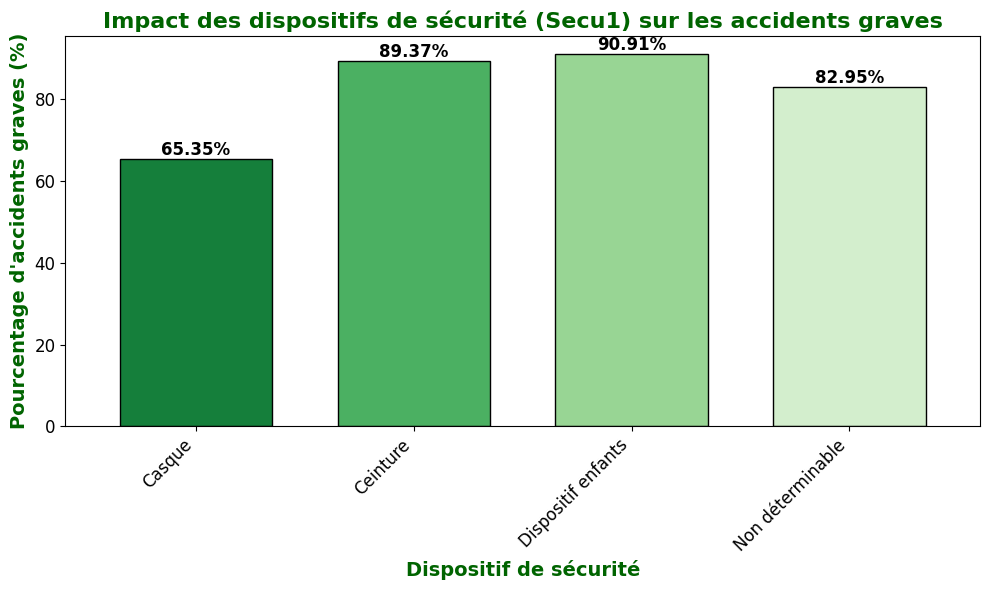


Impact des équipements de sécurité (Secu2) sur les accidents graves (en %) :
+---+-----------------------------------+-------------------+
|   |      Équipement de sécurité       |  Pourcentage (%)  |
+---+-----------------------------------+-------------------+
| 0 |     Airbag personnel (2/3 RM)     | 82.06239168110918 |
| 1 | Airbag personnel + Gants (2/3 RM) | 73.04964539007092 |
| 2 |         Aucun équipement          | 93.3749691101476  |
| 3 |        Autres équipements         | 55.46038543897216 |
| 4 |          Gants (2/3 RM)           | 63.99292988805656 |
| 5 |        Gilet réfléchissant        | 95.01639344262294 |
+---+-----------------------------------+-------------------+


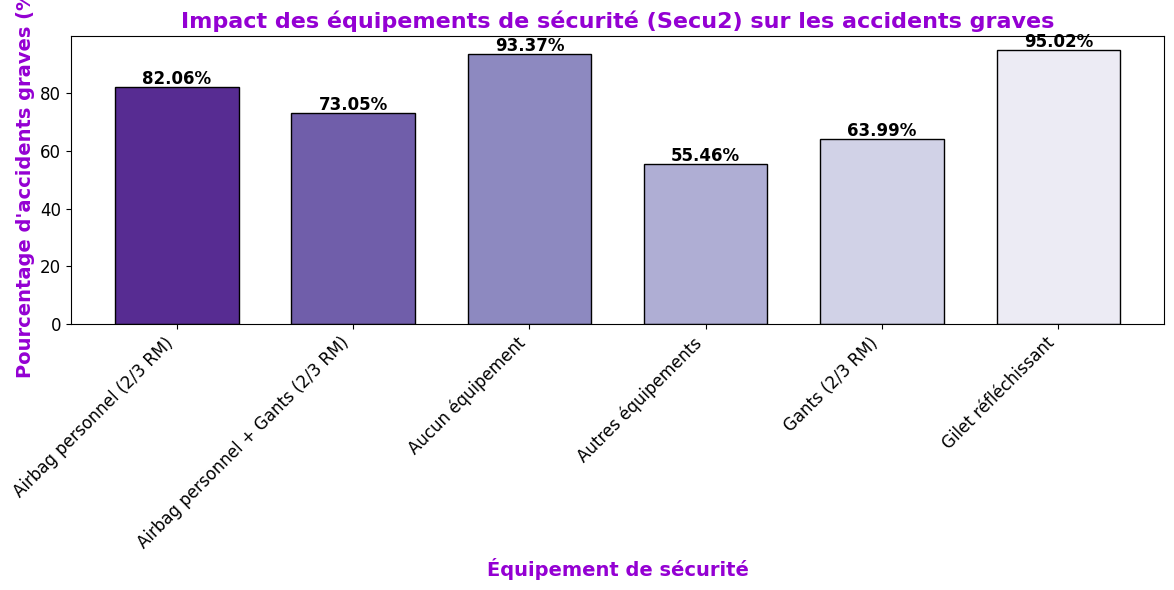

In [39]:
secu1_labels = {
    1: 'Ceinture',
    2: 'Casque',
    3: 'Dispositif enfants',
    8: 'Non déterminable'
}

secu2_labels = {
    0: 'Aucun équipement',
    4: 'Gilet réfléchissant',
    5: 'Airbag personnel (2/3 RM)',
    6: 'Gants (2/3 RM)',
    7: 'Airbag personnel + Gants (2/3 RM)',
    9: 'Autres équipements'
}

# Mapping des libellés sur le DataFrame
df_usagers['secu1_label'] = df_usagers['secu1'].map(secu1_labels)
df_usagers['secu2_label'] = df_usagers['secu2'].map(secu2_labels)

df_usagers['accident_grave'] = df_usagers['grav'].apply(lambda x: 1 if x in [1, 4] else 0)

# 1. Étude de l'utilisation des dispositifs de sécurité
secu1_usage = df_usagers['secu1_label'].value_counts(normalize=True) * 100
secu2_usage = df_usagers['secu2_label'].value_counts(normalize=True) * 100

print("\nRépartition des dispositifs de sécurité (secu1) :")
print(tabulate(secu1_usage.reset_index(), headers=["Dispositif de sécurité", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'utilisation des dispositifs de sécurité (secu1)
plt.figure(figsize=(10, 6))
secu1_usage.plot(kind='bar', color=sns.color_palette("Blues_r", len(secu1_usage)), edgecolor='black', width=0.7)

plt.title('Utilisation des dispositifs de sécurité (Secu1)', fontsize=16, weight='bold', color='navy')
plt.xlabel('Dispositif de sécurité', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Pourcentage (%)', fontsize=14, weight='bold', color='darkblue')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(secu1_usage):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("\nRépartition des équipements de sécurité (secu2) :")
print(tabulate(secu2_usage.reset_index(), headers=["Équipement de sécurité", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'utilisation des équipements de sécurité (secu2)
plt.figure(figsize=(12, 6))

secu2_usage.plot(kind='bar', color=sns.color_palette("YlOrRd", len(secu2_usage)), edgecolor='black', width=0.7)

plt.title('Utilisation des équipements de sécurité (Secu2)', fontsize=16, weight='bold', color='darkred')
plt.xlabel('Équipement de sécurité', fontsize=14, weight='bold', color='darkred')
plt.ylabel('Pourcentage (%)', fontsize=14, weight='bold', color='darkred')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(secu2_usage):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 2. Comparaison des taux de blessures graves ou de décès
impact_secu1 = df_usagers.groupby('secu1_label')['accident_grave'].mean() * 100
impact_secu2 = df_usagers.groupby('secu2_label')['accident_grave'].mean() * 100

print("\nImpact des dispositifs de sécurité (Secu1) sur les accidents graves (en %) :")
print(tabulate(impact_secu1.reset_index(), headers=["dispositifs de sécurité", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'impact des dispositifs de sécurité sur les accidents graves (secu1)
plt.figure(figsize=(10, 6))
impact_secu1.plot(kind='bar', color=sns.color_palette("Greens_r", len(impact_secu1)), edgecolor='black', width=0.7)
plt.title('Impact des dispositifs de sécurité (Secu1) sur les accidents graves', fontsize=16, weight='bold', color='darkgreen')
plt.xlabel('Dispositif de sécurité', fontsize=14, weight='bold', color='darkgreen')
plt.ylabel('Pourcentage d\'accidents graves (%)', fontsize=14, weight='bold', color='darkgreen')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(impact_secu1):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("\nImpact des équipements de sécurité (Secu2) sur les accidents graves (en %) :")
print(tabulate(impact_secu2.reset_index(), headers=["Équipement de sécurité", "Pourcentage (%)"], tablefmt="pretty", floatfmt=".2f"))

# Visualisation de l'impact des équipements de sécurité sur les accidents graves (secu2)
plt.figure(figsize=(12, 6))
impact_secu2.plot(kind='bar', color=sns.color_palette("Purples_r", len(impact_secu2)), edgecolor='black', width=0.7)
plt.title('Impact des équipements de sécurité (Secu2) sur les accidents graves', fontsize=16, weight='bold', color='darkviolet')
plt.xlabel('Équipement de sécurité', fontsize=14, weight='bold', color='darkviolet')
plt.ylabel('Pourcentage d\'accidents graves (%)', fontsize=14, weight='bold', color='darkviolet')

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(impact_secu2):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, color='black', weight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [ ]:
## Répartition des dispositifs de sécurité (Secu1 et Secu2)

#En examinant la répartition des dispositifs de sécurité secu1, on constate que la ceinture 
# de sécurité est l'équipement le plus fréquemment utilisé, avec 65,63 % des usagers. 
# Le casque suit avec 19,79 %, tandis que les dispositifs pour enfants représentent 
# une part marginale, à 0,65 %. Une proportion non négligeable (13,92 %) des équipements n'est pas déterminée,
#  ce qui pourrait indiquer un manque de données ou d'informations sur certains usagers.

#Pour secu2, une majorité (74,62 %) des usagers impliqués dans les accidents ne portaient aucun 
# équipement spécifique. Parmi ceux qui portaient des équipements, les gants (2/3 RM) sont 
# les plus courants (19,88 %), suivis des gilets réfléchissants (2,54 %) et
# des airbags personnels (2/3 RM) (1,93 %). Les autres équipements et 
# les combinaisons airbag personnel + gants (2/3 RM) représentent des proportions plus faibles (0,78 % et 0,23 %, respectivement).


## Impact des dispositifs de sécurité sur la gravité des accidents

#L'analyse laisse croire à une relation entre l'utilisation des dispositifs de sécurité (secu1) 
# et la gravité des accidents. Les usagers portant des dispositifs pour enfants enregistrent
#  le pourcentage le plus élevé d'accidents graves à 90,91 %, suivi 
# par ceux portant la ceinture de sécurité (89,39 %). Les usagers avec des équipements non déterminables 
# enregistrent également un impact élevé (83,32 %), tandis que ceux portant un casque présentent un pourcentage moindre (65,38 %).

#En ce qui concerne les équipements spécifiques (secu2), les usagers portant des gilets réfléchissants (95,02 %) présentent le pourcentage
#d'accidents le plus élevé, suivi par ceux ne portant aucun équipement(93,39 %) . 
# À l'inverse, les usagers portant des gants (2/3 RM) et des airbags personnels + gants enregistrent des impacts plus modérés, à 64,03 % et 73,05 %, respectivement. 
#Enfin, ceux portant d'autres équipements affichent le pourcentage le plus faible d'accidents graves (55,46 %), indiquant une meilleure protection potentielle.

Analyse des trajets


Statistiques descriptives de la variable 'trajet' :
+---+-----------------------------+-----------+--------------------+
|   |       Type de trajet        | Fréquence |   Proportion (%)   |
+---+-----------------------------+-----------+--------------------+
| 0 |      Promenade-loisirs      |   46125   | 37.49085588880761  |
| 1 |        Non renseigné        |   33084   | 26.89100219458669  |
| 2 |      Domicile-travail       |   16473   | 13.389417215313337 |
| 3 | Utilisation professionnelle |   10995   | 8.936844672031212  |
| 4 |            Autre            |   9771    | 7.941965374298951  |
| 5 |       Courses-achats        |   3596    | 2.9228643420303992 |
| 6 |       Domicile-école        |   2986    | 2.4270503129318053 |
+---+-----------------------------+-----------+--------------------+


/tmp/ipykernel_7587/1284194051.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trajet_counts.values, y=trajet_counts.index, palette='coolwarm_r')  # Palette inversée


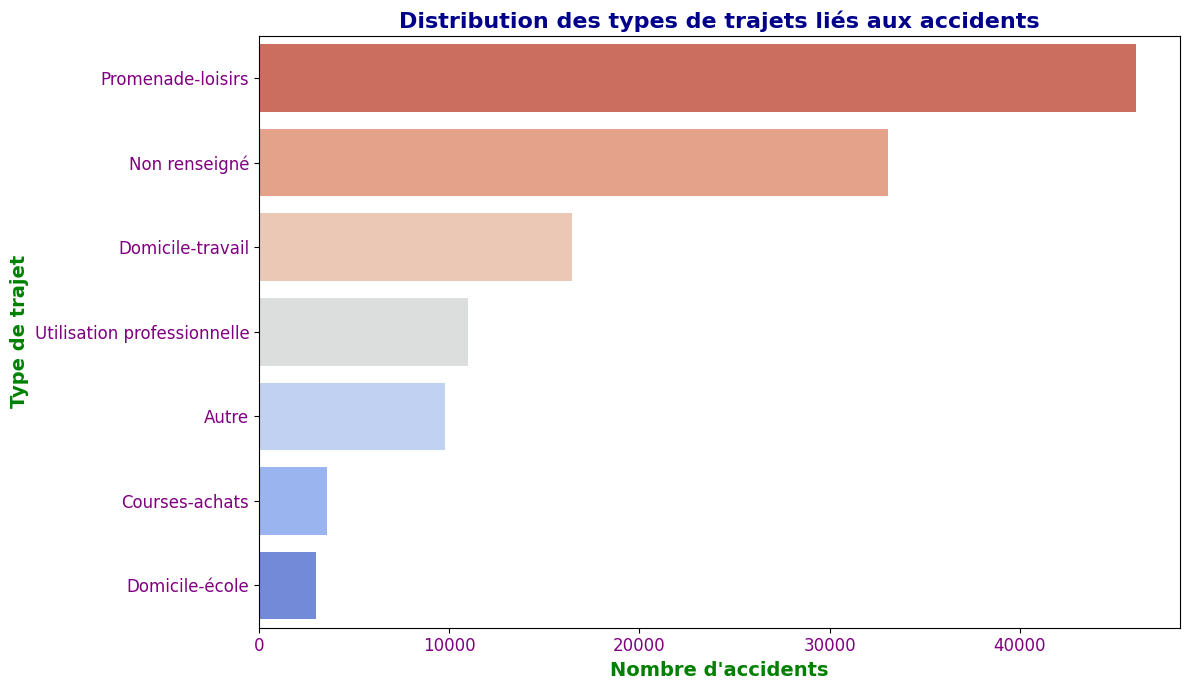

In [46]:
trajet_labels = {
    0: 'Non renseigné',
    1: 'Domicile-travail',
    2: 'Domicile-école',
    3: 'Courses-achats',
    4: 'Utilisation professionnelle',
    5: 'Promenade-loisirs',
    9: 'Autre'
}

df_usagers['trajet_label'] = df_usagers['trajet'].map(trajet_labels)

# Calcul des fréquences et proportions
trajet_counts = df_usagers['trajet_label'].value_counts()
trajet_proportions = df_usagers['trajet_label'].value_counts(normalize=True) * 100

trajet_summary = pd.DataFrame({
    'Fréquence': trajet_counts,
    'Proportion (%)': trajet_proportions
}).sort_values(by='Fréquence', ascending=False)

print("\nStatistiques descriptives de la variable 'trajet' :")
print(tabulate(trajet_summary.reset_index(), headers=["Type de trajet", "Fréquence", "Proportion (%)"], tablefmt="pretty", floatfmt=".2f"))

# Distribution des types de trajets
plt.figure(figsize=(12, 7))
sns.barplot(x=trajet_counts.values, y=trajet_counts.index, palette='coolwarm_r')  # Palette inversée

plt.title("Distribution des types de trajets liés aux accidents", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Nombre d'accidents", fontsize=14, fontweight='bold', color='green')
plt.ylabel("Type de trajet", fontsize=14, fontweight='bold', color='green')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.tight_layout()
plt.show()


#Les statistiques montrent que les promenades-loisirs dominent les motifs de déplacement des usagers impliqués dans des accidents,
#  représentant 37,42 %, suivies des trajets non renseignés (27,01 %).
#  Les trajets domicile-travail (13,36 %) et utilisation professionnelle (8,92 %) révèlent l'importance des déplacements liés à l'activité 
# professionnelle, totalisant 22,28 %, et pointent des enjeux spécifiques comme les risques associés aux heures de pointe, au stress, 
# et à la fatigue. Les trajets domicile-école (2,42 %) et les déplacements pour courses-achats (2,92 %) ont une contribution moindre.

Analyse descriptive des localisations, actions et états des piétons


Statistiques descriptives pour Localisation du piéton :
+-------------------------------+-------------------------+----------------------+
|           Catégorie           | Fréquence_d_observation |    Proportion (%)    |
+-------------------------------+-------------------------+----------------------+
|          Sans objet           |         52113.0         |  84.49340921251034   |
| Sans signalisation lumineuse  |         3267.0          |  5.296950240770466   |
| A - de 50 m du passage piéton |         1976.0          |  3.2037874734503946  |
| Avec signalisation lumineuse  |         1529.0          |   2.47904405207776   |
| A + de 50 m du passage piéton |         1453.0          |  2.3558214569450526  |
|           Trottoir            |          840.0          |  1.361933946203609   |
|     Sur accotement ou BAU     |          336.0          |  0.5447735784814436  |
|           Inconnue            |          152.0          | 0.24644519026541498  |
|       Sur contre-allée      

/tmp/ipykernel_7587/3390052539.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['Fréquence'], y=summary.index, palette='magma')  # Utilisation de la palette 'magma' pour une jolie couleur


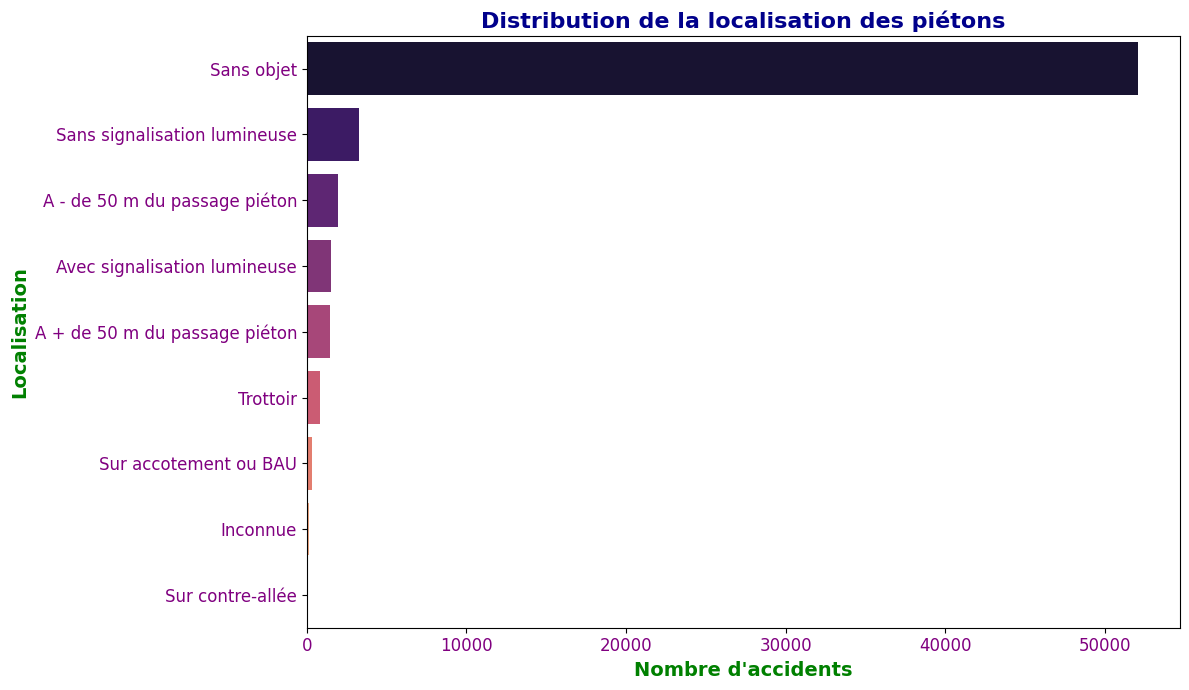

/tmp/ipykernel_7587/3390052539.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['Fréquence'], y=summary.index, palette='magma')  # Utilisation de la palette 'magma' pour une jolie couleur


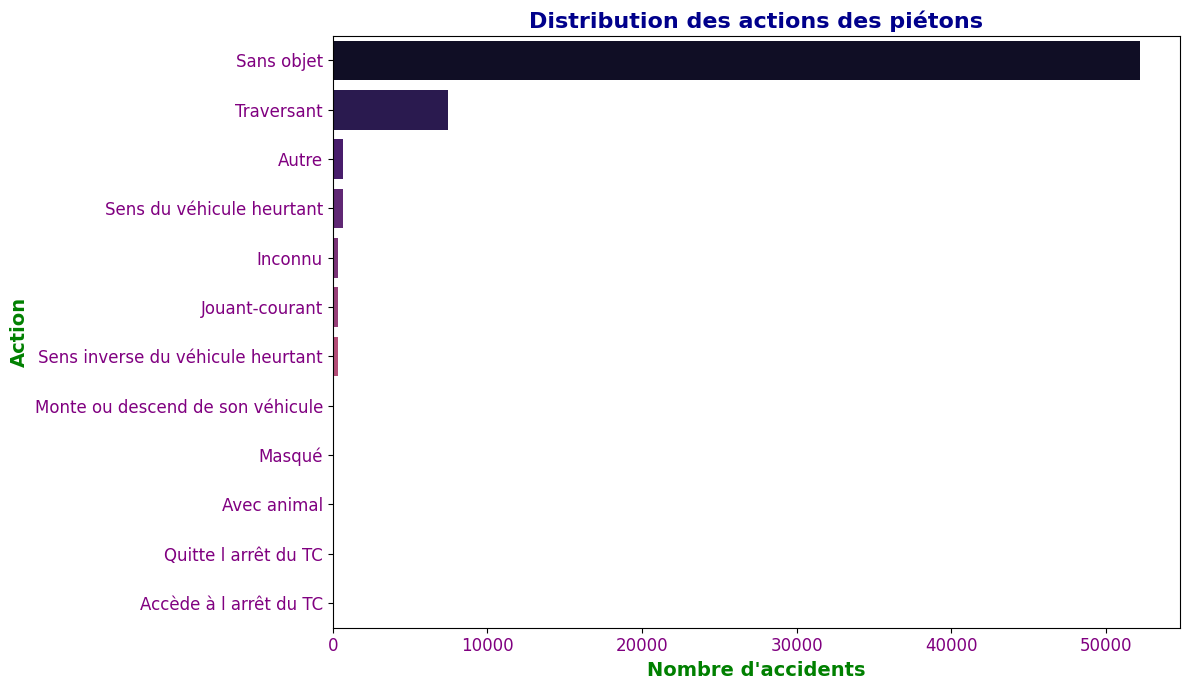

/tmp/ipykernel_7587/3390052539.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary['Fréquence'], y=summary.index, palette='magma')  # Utilisation de la palette 'magma' pour une jolie couleur


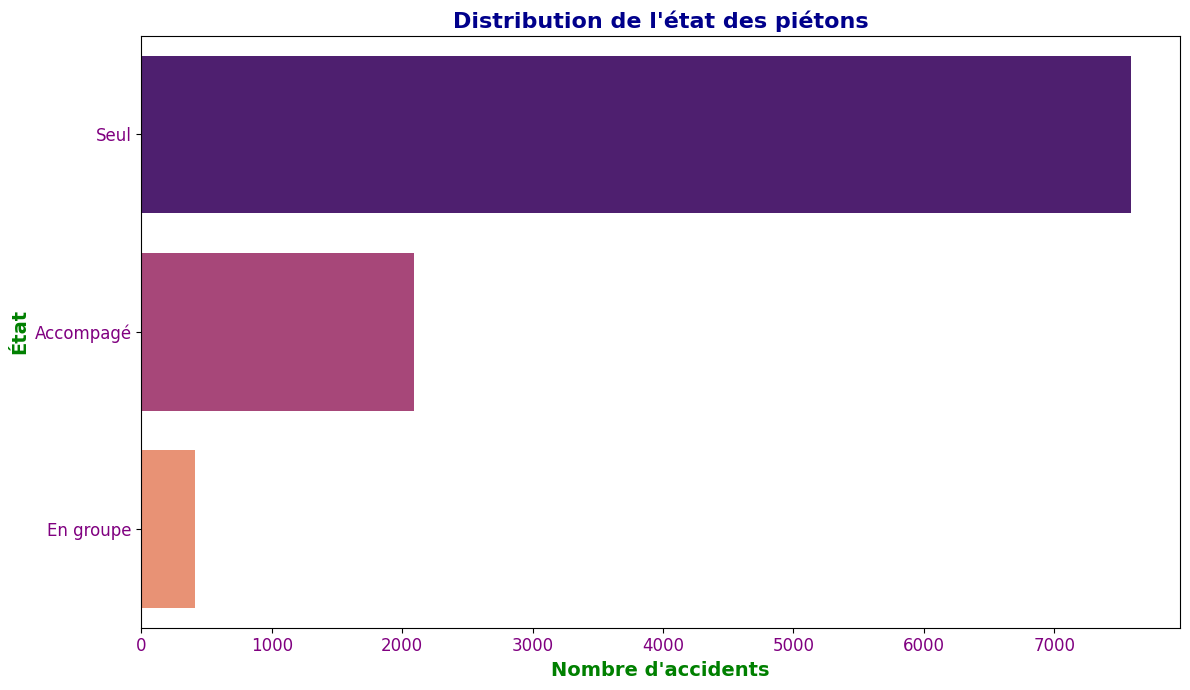


Croisement entre localisation et action du piéton (% par localisation) :
+-------------------------------+------------------------+-----------------------+---------------------+---------------------+-----------------------+-----------------------+----------------------------------+----------------------+---------------------+---------------------------+-----------------------------------+-----------------------+
|          locp_label           | Accède à l arrêt du TC |         Autre         |     Avec animal     |       Inconnu       |    Jouant-courant     |        Masqué         | Monte ou descend de son véhicule | Quitte l arrêt du TC |     Sans objet      | Sens du véhicule heurtant | Sens inverse du véhicule heurtant |      Traversant       |
+-------------------------------+------------------------+-----------------------+---------------------+---------------------+-----------------------+-----------------------+----------------------------------+----------------------+--------

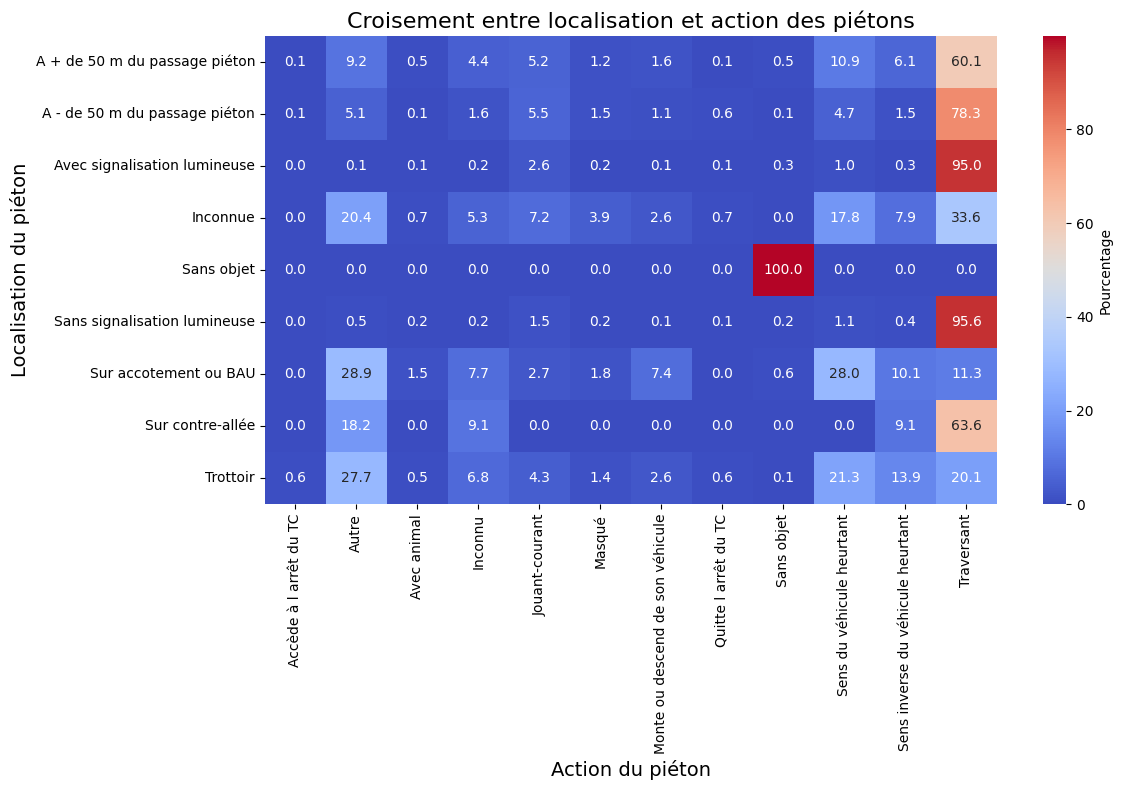

In [ ]:
locp_labels = {
    0: 'Sans objet',
    1: 'A + de 50 m du passage piéton',
    2: 'A - de 50 m du passage piéton',
    3: 'Sans signalisation lumineuse',
    4: 'Avec signalisation lumineuse',
    5: 'Trottoir',
    6: 'Sur accotement ou BAU',
    7: 'Sur contre-allée',
    8: 'Inconnue'
}                                                                                                                                  
actp_labels = {
    '-1': 'Non renseigné',
    '0': 'Sans objet',
    '1': 'Sens du véhicule heurtant',
    '2': 'Sens inverse du véhicule heurtant',
    '3': 'Traversant',
    '4': 'Masqué',
    '5': 'Jouant-courant',
    '6': 'Avec animal',
    '7': 'Quitte l arrêt du TC',
    '8': 'Accède à l arrêt du TC',
    '9': 'Autre',
    'A': 'Monte ou descend de son véhicule', 
    'B': 'Inconnu'  
}

etatp_labels = {
    0: 'Sans objet',
    1: 'Seul',
    2: 'Accompagé',
    3: 'En groupe'
}


# Appliquer les mappings aux colonnes
df_usagers['locp_label'] = df_usagers['locp'].map(locp_labels)
df_usagers['actp_label'] = df_usagers['actp'].map(actp_labels)
df_usagers['etatp_label'] = df_usagers['etatp'].map(etatp_labels)

# Analyse descriptive : Fréquences et proportions
def summarize_variable(column, label):
    counts = df_usagers[column].value_counts()
    proportions = df_usagers[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Fréquence': counts, 'Proportion (%)': proportions})
    print(f"\nStatistiques descriptives pour {label} :")
    print(tabulate(summary, headers=["Catégorie", "Fréquence_d_observation", "Proportion (%)"], tablefmt="pretty", floatfmt=".2f"))
    return summary

locp_summary = summarize_variable('locp_label', 'Localisation du piéton')
actp_summary = summarize_variable('actp_label', 'Action du piéton')
etatp_summary = summarize_variable('etatp_label', 'État du piéton')

# Visualisations avec améliorations
def plot_distribution(summary, title, ylabel):
    plt.figure(figsize=(12, 7))
    sns.barplot(x=summary['Fréquence'], y=summary.index, palette='magma')  # Utilisation de la palette 'magma' pour une jolie couleur
    plt.title(title, fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Nombre d'accidents", fontsize=14, fontweight='bold', color='green')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold', color='green')
    plt.xticks(fontsize=12, color='purple')
    plt.yticks(fontsize=12, color='purple')
    plt.tight_layout()
    plt.show()

plot_distribution(locp_summary, "Distribution de la localisation des piétons", "Localisation")
plot_distribution(actp_summary, "Distribution des actions des piétons", "Action")
plot_distribution(etatp_summary, "Distribution de l'état des piétons", "État")

# Analyse croisée (Localisation vs Action)
cross_tab = pd.crosstab(df_usagers['locp_label'], df_usagers['actp_label'], normalize='index') * 100
cross_tab = cross_tab.fillna(0)  # Remplacer NaN par 0

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Pourcentage'})
plt.title("Croisement entre localisation et action des piétons", fontsize=16)
plt.xlabel("Action du piéton", fontsize=14)
plt.ylabel("Localisation du piéton", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#### Localisation du piéton (locp_label) :
#La majorité des piétons (84,5 %) se trouvent dans des zones sans objet de localisation précise. Parmi les autres catégories, 
# la majorité se situe à plus de 50 mètres d'un passage piéton (5,3 %) et à moins de 50 mètres (3,2 %). 
# La signalisation lumineuse est présente dans seulement 2,5 % des cas, et un peu plus de 2 % des piétons se trouvent dans des zones 
# à plus de 50 mètres du passage piéton. La localisation précise de l'accident est inconnue dans moins de 1 % des cas, et seules de rares 
# observations concernent des piétons sur des trottoirs (1,4 %) ou sur des accotements (0,5 %).
##########

#### Action du piéton (actp_label) :
#La majorité des piétons (83,8 %) sont dans une situation où l'action est considérée comme "sans objet". 
# Les actions les plus fréquentes sont les piétons traversant (11,9 %) ou des actions considérées comme "autres" (1,1 %). 
# Les cas où le piéton est heurté dans le sens du véhicule sont relativement moins fréquents (1 %), tout comme les situations où
#  il se trouve dans le sens inverse du véhicule heurtant (0,5 %). D'autres actions comme "jouant-courant", "avec animal" ou "masqué" 
# sont très peu fréquentes, avec des proportions inférieures à 1 %, et les cas où le piéton monte ou descend de son véhicule ou accède 
# à un arrêt de transport en commun sont rares (moins de 0,2 %).
##########

#### État du piéton (etatp_label) :
# La grande majorité des piétons sont seuls lors de l'accident (75,2 %), tandis qu'une proportion importante est accompagnée (20,7 %). 
# Les cas où le piéton est en groupe sont beaucoup moins fréquents, représentant seulement 4,1 % des observations.

####################Croisements 
#Les résultats montrent une tendance générale où la majorité des piétons traversent la rue de manière traversante,
#avec une gande proportion d'actions marquées par l'absence de signalisation ou l'absence de comportement spécifique ("Sans objet").
#Les localisations près des passages piétons montrent une plus grande tendance à traverser de manière traversante, mais des comportements
#tels que "Sens du véhicule heurtant" ou "Autre" sont plus fréquents dans des zones où la signalisation lumineuse ou les trottoirs sont moins présents.

#Il semble aussi qu'une partie des actions liées aux transports en commun ("Accède à l’arrêt du TC", "Quitte l’arrêt du TC") 
#soit relativement faible, bien que certaines localisations, comme "Inconnue" et "Sur accotement ou BAU", montrent une certaine
#variété dans les actions des piétons.

Tableau croisé dynamique pour observer les relations entre les variables

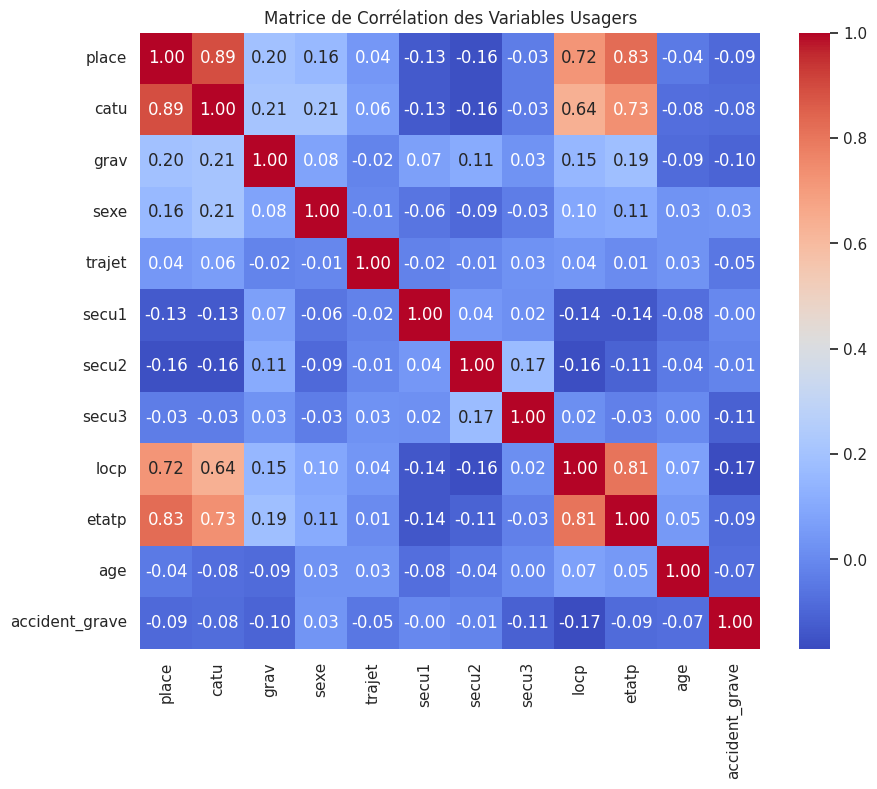

In [69]:
#Matrice de corrélation
col_a_exclu = ['Num_Acc','an_nais']
df_usagers_col_a_exclu = df_usagers.drop(columns=col_a_exclu)
df_numeric = df_usagers_col_a_exclu.select_dtypes(include=['number'])
corr_USAGERS = df_numeric.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_USAGERS, annot=True, cmap='coolwarm', fmt='.2f', 
            xticklabels=corr_USAGERS.columns, yticklabels=corr_USAGERS.columns)

plt.title("Matrice de Corrélation des Variables Usagers")
plt.show()

#Selon le tableau de corrélation les variables couples de variables fortement corrélées sont: (place, catu), (place,locp), (place,etatp), (catu,etatp) et (locp,etatp)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Sélection des variables numériques
df_usagers_col_a_exclu = df_usagers.drop(columns=col_a_exclu)
df_numeric = df_usagers_col_a_exclu.select_dtypes(include=['number'])

# Création du widget Dropdown
variable_selector = widgets.Dropdown(
    options=df_numeric.columns.tolist(),
    description='Variable:',
    disabled=False
)

# Fonction pour afficher le boxplot
def show_boxplot(variable):
    # Vérifier si la variable existe dans le DataFrame
    if variable in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        # Créer un boxplot avec une couleur personnalisée et une taille de boîte ajustée
        sns.boxplot(x=df_usagers[variable], 
                    color='lightcoral', 
                    width=0.5,          
                    fliersize=7,        
                    linewidth=2,        
                    whis=1.5)           

        plt.title(f'Boxplot de {variable}', fontsize=18, fontweight='bold')

        plt.xlabel(variable, fontsize=14)
        plt.ylabel('Valeur', fontsize=14)

        # Afficher la grille pour rendre les graphes plus lisibles
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Personnaliser la couleur des axes et ajouter un fond doux
        plt.gca().set_facecolor('whitesmoke')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Afficher le graphique
        plt.show()
    else:
        print("La variable spécifiée n'existe pas dans les données.")

# Affichage du widget pour permettre l'interaction
display(variable_selector)

# Lier le widget avec la fonction de boxplot
widgets.interactive(show_boxplot, variable=variable_selector)


Dropdown(description='Variable:', options=('place', 'catu', 'grav', 'trajet', 'secu1', 'secu2', 'secu3', 'locp…

interactive(children=(Dropdown(description='Variable:', options=('place', 'catu', 'grav', 'trajet', 'secu1', '…

In [73]:
col_a_exclu = ['Num_Acc','an_nais','sexe']
df_usagers_col_a_exclu = df_usagers.drop(columns=col_a_exclu)

df_numeric = df_usagers_col_a_exclu.select_dtypes(include=['number'])

variable_selector = widgets.Dropdown(
    options=df_numeric.columns.tolist(),
    description='Variable:',
    disabled=False
)

# Fonction pour afficher le boxplot
def show_boxplot(variable):
    # Vérifier si la variable existe dans le DataFrame
    if variable in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        # Créer un boxplot avec une couleur personnalisée et une taille de boîte ajustée
        sns.boxplot(x=df_usagers[variable], 
                    color='lightcoral', 
                    width=0.5,          
                    fliersize=7,        
                    linewidth=2,        
                    whis=1.5)           

        plt.title(f'Boxplot de {variable}', fontsize=18, fontweight='bold')

        plt.xlabel(variable, fontsize=14)
        plt.ylabel('Valeur', fontsize=14)

        # Afficher la grille pour rendre les graphes plus lisibles
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Personnaliser la couleur des axes et ajouter un fond doux
        plt.gca().set_facecolor('whitesmoke')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Afficher le graphique
        plt.show()

    else:
        print("La variable spécifiée n'existe pas dans les données.")

# Lier le widget avec la fonction de boxplot
widgets.interactive(show_boxplot, variable=variable_selector)



interactive(children=(Dropdown(description='Variable:', options=('place', 'catu', 'grav', 'trajet', 'secu1', '…

In [14]:
# Base des véhicules 
df_vehicules = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/vehicules-2023.csv", sep = ';')
df_vehicules.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [7]:
# Base des lieux 
df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')
df_lieux.head(10)

/tmp/ipykernel_13921/3473159961.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
5,202300000004,2,6,0,NaN,2,4,0,1,18,1,1,NaN,12,2,0,1,50
6,202300000005,4,NaN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
7,202300000005,4,NaN,0,NaN,2,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
8,202300000006,4,NaN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,50
9,202300000007,3,7,0,NaN,2,4,3,1,-1,-1,1,NaN,-1,2,0,1,50


In [6]:
df_caract = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [ ]:
df_caract.shape

(54822, 15)

## Fusion des bases de données

In [8]:

df_merge = df_usagers.merge(df_vehicules, on=["Num_Acc","id_vehicule"], how="inner") 
df_merge = df_merge.merge(df_lieux, on="Num_Acc", how="inner")
df_merge = df_merge.merge(df_caract, on="Num_Acc", how="inner")
df_merge.shape

NameError: name 'df_usagers' is not defined

In [ ]:
# ajout du libellé des départements

df_code_dep=df_dep[["DEP","LIBELLE"]]
#df_code_com=df_com[["COM","LIBELLE"]]
df_merge=pd.merge(left=df_merge, right=df_code_dep,left_on="dep", right_on="DEP", how="left")
#database=pd.merge(left=df_merge, right=df_code_com,left_on="com", right_on="COM", how="left")
database=df_merge.drop(["DEP"], axis=1)
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163683 entries, 0 to 163682
Data columns (total 57 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      163683 non-null  int64  
 1   id_usager    163683 non-null  object 
 2   id_vehicule  163683 non-null  object 
 3   num_veh_x    163683 non-null  object 
 4   place        163683 non-null  int64  
 5   catu         163683 non-null  int64  
 6   grav         163683 non-null  int64  
 7   sexe         163683 non-null  int64  
 8   an_nais      160171 non-null  float64
 9   trajet       163683 non-null  int64  
 10  secu1        163683 non-null  int64  
 11  secu2        163683 non-null  int64  
 12  secu3        163683 non-null  int64  
 13  locp         163683 non-null  int64  
 14  actp         163683 non-null  object 
 15  etatp        163683 non-null  int64  
 16  num_veh_y    163683 non-null  object 
 17  senc         163683 non-null  int64  
 18  catv         163683 non-

## Nettoyage de la base

In [ ]:
# gerer les valeurs manquantes et les recodages. se servir de la documentation des variables

(20, 2)

## Description univariées

In [ ]:
print(f"la base usagers a {df_usagers.shape[0]} observations et {df_usagers.shape[1]} variables.")

la base usagers a 125789 observations et 16 variables.


Text(0, 0.5, 'percentage(%)')

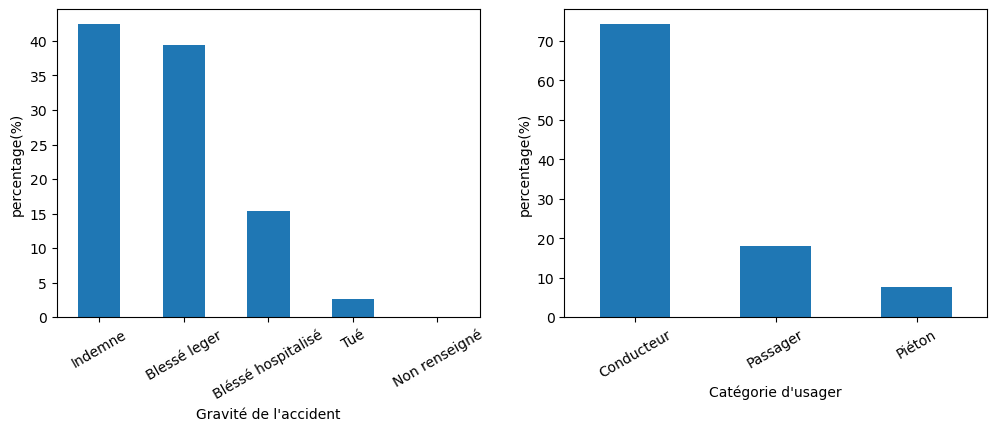

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
grav_dict={-1:"Non renseigné",1:'Indemne',2:"Tué",3:'Bléssé hospitalisé',4:'Blessé leger'}
grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(grav_nv.value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravité de l'accident")
plt.ylabel("percentage(%)")

plt.subplot(1,2,2)
catu_dict={1:"Conducteur",2:"Passager",3:"Piéton"}
catu_nv=df_usagers['catu'].replace(catu_dict)
catu_prct=(catu_nv.value_counts()/df_usagers.shape[0])*100
catu_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Catégorie d'usager")
plt.ylabel("percentage(%)")


Text(0, 0.5, 'percentage(%)')

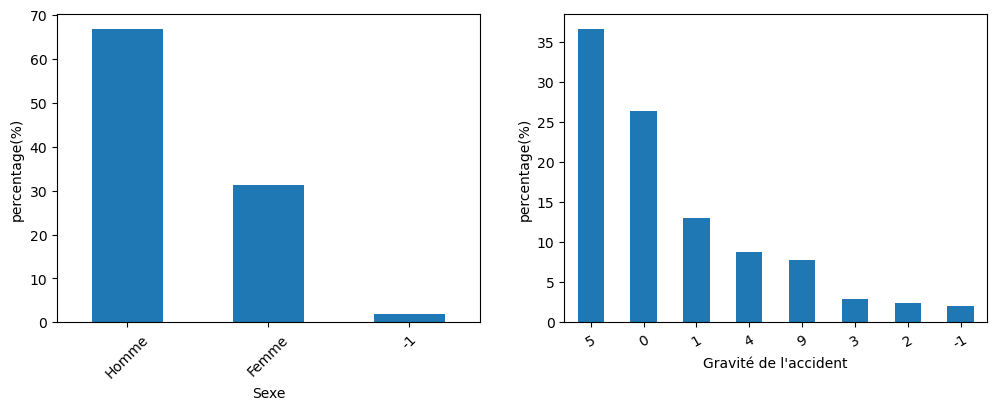

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sexe_dict={1:"Homme",2:"Femme"}
sexe_nv=df_usagers['sexe'].replace(sexe_dict)
sexe_prct=(sexe_nv.value_counts()/df_usagers.shape[0])*100
sexe_prct.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Sexe")
plt.ylabel("percentage(%)")


plt.subplot(1,2,2)
#grav_dict={-1:"Non renseigné",1:'Indemne',2:"Tué",3:'Bléssé hospitalisé',4:'Blessé leger'}
#grav_nv=df_usagers['grav'].replace(grav_dict)
grav_prct=(df_usagers['trajet'].value_counts()/df_usagers.shape[0])*100
grav_prct.plot(kind="bar")
plt.xticks(rotation=30)
plt.xlabel("Gravité de l'accident")
plt.ylabel("percentage(%)")


In [5]:
#cration carte
import geopandas as gpd

## Analyses Lieux

In [13]:
df_lieux.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [15]:
catr_labels = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route départementale",
    4: "Voie communale",
    5: "Hors réseau public",
    6: "Parc de stationnement",
    7: "Routes de métropole urbaine",
    9: "Autre"
}

circ_labels = {
    -1: "Non renseigné",
    1: "À sens unique",
    2: "Bidirectionnelle",
    3: "À chaussées séparées",
    4: "Avec voies d’affectation variable"
}

vosp_labels = {
    -1: "Non renseigné",
    0: "Sans objet",
    1: "Piste cyclable",
    2: "Bande cyclable",
    3: "Voie réservée"
}

prof_labels = {
    -1: "Non renseigné",
    1: "Plat",
    2: "Pente",
    3: "Sommet de côte",
    4: "Bas de côte"
}

plan_labels = {
    -1: "Non renseigné",
    1: "Partie rectiligne",
    2: "En courbe à gauche",
    3: "En courbe à droite",
    4: "En 'S'"
}

surf_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Mouillée",
    3: "Flaques",
    4: "Inondée",
    5: "Enneigée",
    6: "Boue",
    7: "Verglacée",
    8: "Corps gras – huile",
    9: "Autre"
}

infra_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Souterrain - tunnel",
    2: "Pont - autopont",
    3: "Bretelle d’échangeur",
    4: "Voie ferrée",
    5: "Carrefour aménagé",
    6: "Zone piétonne",
    7: "Zone de péage",
    8: "Chantier",
    9: "Autres"
}

situ_labels = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Sur chaussée",
    2: "Sur bande d’arrêt d’urgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie spéciale",
    8: "Autres"
}


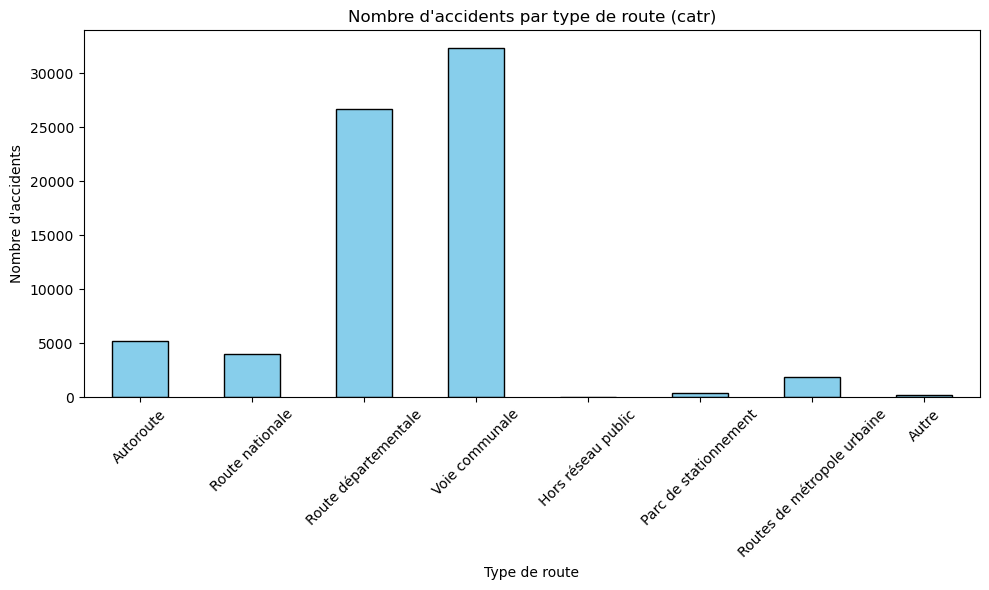

In [16]:
# Comptage des occurrences par catégorie de route
catr_counts = df_lieux['catr'].value_counts().sort_index()

# Remplacement des codes par les labels pour l'affichage
catr_counts.index = catr_counts.index.map(catr_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
catr_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre d'accidents par type de route (catr)")
plt.xlabel("Type de route")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

In [8]:
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [9]:
lum_labels = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé"
}

agg_labels = {
    1: "Hors agglomération",
    2: "En agglomération"
}

int_labels = {
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection à plus de 4 branches",
    6: "Giratoire",
    7: "Place",
    8: "Passage à niveau",
    9: "Autre intersection"
}

atm_labels = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte",
    4: "Neige - grêle",
    5: "Brouillard - fumée",
    6: "Vent fort - tempête",
    7: "Temps éblouissant",
    8: "Temps couvert",
    9: "Autre"
}

col_labels = {
    -1: "Non renseigné",
    1: "Deux véhicules - frontale",
    2: "Deux véhicules – par l’arrière",
    3: "Deux véhicules – par le côté",
    4: "Trois véhicules et plus – en chaîne",
    5: "Trois véhicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision"
}


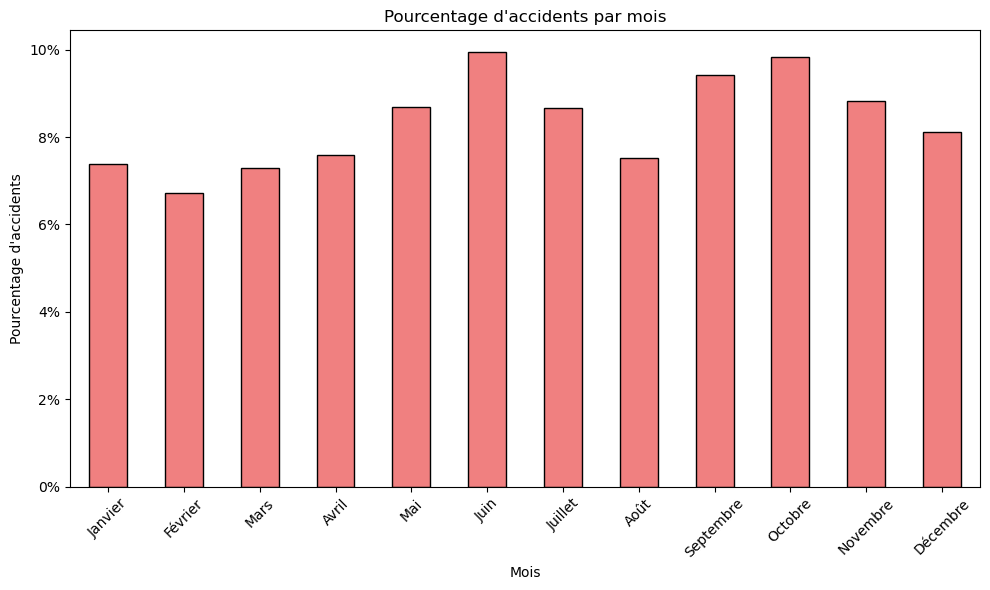

In [11]:
# Calcul des pourcentages d'accidents par mois
mois_counts = df_caract['mois'].value_counts(normalize=True).sort_index() * 100

# Création du diagramme avec pourcentages
plt.figure(figsize=(10, 6))
mois_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Pourcentage d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Pourcentage d'accidents")
plt.xticks(ticks=range(len(mois_counts)), labels=[
    "Janvier", "Février", "Mars", "Avril", "Mai", "Juin", 
    "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"
], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()

# Affichage du graphique
plt.show()

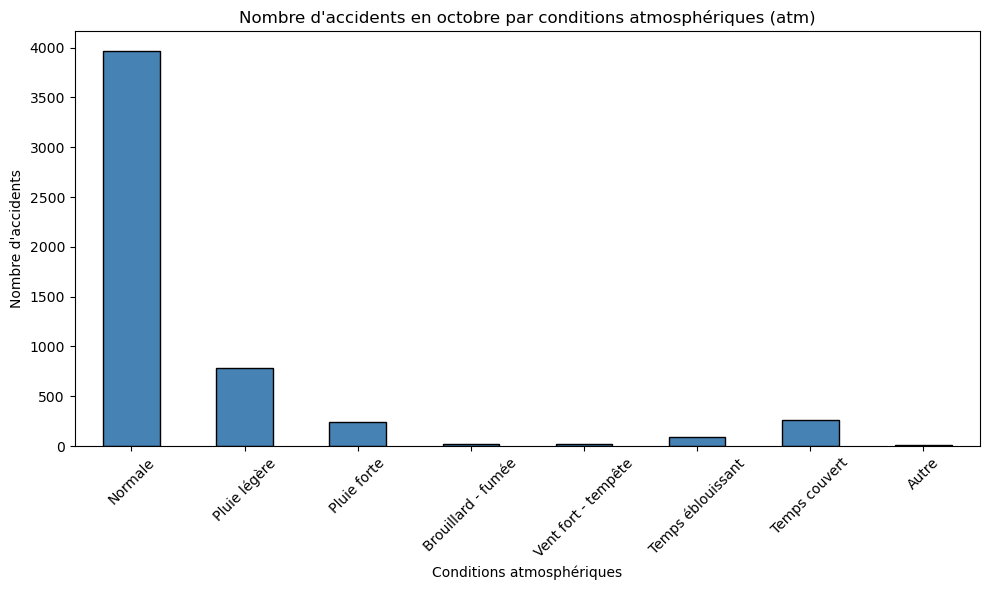

In [12]:
# Filtrer les données pour le mois d'octobre (mois = 10)
octobre_data = df_caract[df_caract['mois'] == 10]

# Croiser les accidents d'octobre avec les conditions atmosphériques (atm)
atm_counts = octobre_data['atm'].value_counts().sort_index()

# Remplacer les codes par leurs labels pour l'affichage
atm_counts.index = atm_counts.index.map(atm_labels)

# Création du diagramme
plt.figure(figsize=(10, 6))
atm_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Nombre d'accidents en octobre par conditions atmosphériques (atm)")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()

In [11]:
accidents_par_departement = df_caract.groupby('dep').size().reset_index(name='nombre_accidents')
accidents_par_departement.head()

,dep,nombre_accidents
0,01,382
1,02,253
2,03,235
3,04,193
4,05,201


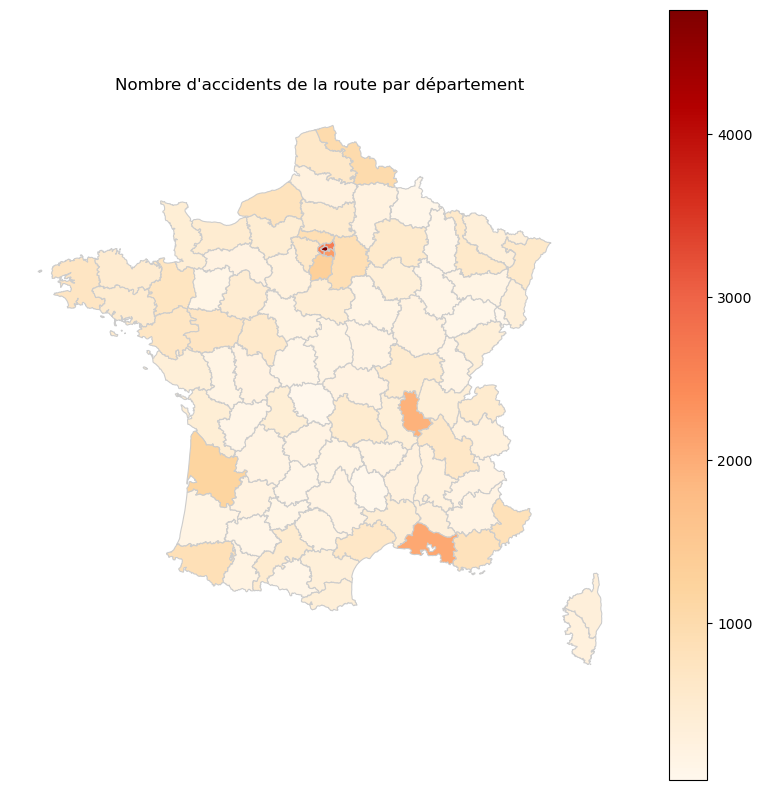

In [ ]:
france_map = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
france_map = france_map.merge(accidents_par_departement, left_on="code", right_on="dep")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
france_map.plot(column="nombre_accidents", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

plt.title("Nombre d'accidents de la route par département")
plt.axis("off")
plt.show()#i

In [13]:
dep_IDF = ["75", "77", "78", "91", "92", "93", "94", "95"]
accidents_idf = df_caract[df_caract['dep'].isin(dep_IDF)]

# Remplacer les virgules par des points et convertir en float
accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)

accidents_idf.head()

/tmp/ipykernel_8307/4290649706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_idf['lat'] = accidents_idf['lat'].str.replace(',', '.').astype(float)
/tmp/ipykernel_8307/4290649706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_idf['long'] = accidents_idf['long'].str.replace(',', '.').astype(float)


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,48.732484,2.446876
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,48.785810,2.492170


In [ ]:
import folium
from folium.plugins import HeatMap

accidents_coords = accidents_idf[['lat', 'long']].dropna()

# Initialiser la carte centrée sur l'Île-de-France
map_idf = folium.Map(location=[48.8566, 2.3522], zoom_start=10)

# Ajouter la carte de densité
HeatMap(
    data=accidents_coords.values,
    radius=10,               
    blur=15,                 
    max_zoom=10,             
    min_opacity=0.2,         
    gradient={               
        0.2: 'blue',
        0.4: 'lime',
        0.6: 'yellow',
        0.8: 'orange',
        1.0: 'red'
    }
).add_to(map_idf)

# Afficher la carte
map_idf